## Hyperparameters and Model Validation

### Model validation the wrong way

In [58]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [59]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [60]:
len(y)

150

In [61]:
#Next we choose a model and hyperparameters. Here we'll use a k-neighbors classifier 
#with n_neighbors=1. This is a very simple and intuitive model that says "the label of an unknown point is 
#the same as the label of its closest training point:"
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [62]:
model.fit(X, y)
y_model = model.predict(X)

In [63]:
#Finally, we compute the fraction of correctly labeled points:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [64]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Model validation the right way: Holdout sets

In [65]:
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [68]:
print(model.fit(X1, y1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


### Model validation via cross-validation

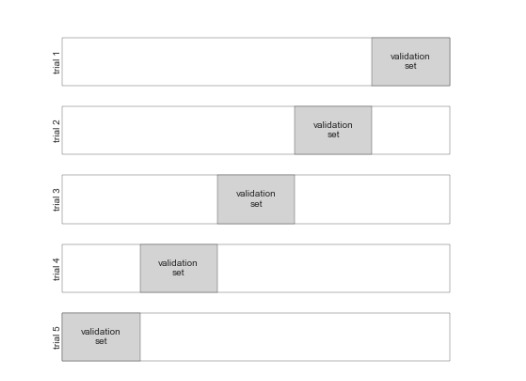

In [6]:
from IPython.display import Image
Image(filename='image.png')

In [7]:
from sklearn.cross_validation import cross_val_score
#from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [8]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
scores.mean()

0.96

### Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 7.0)

def PolynomialRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [17]:
#It is equivalent to reshape(-1, order=order)
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6]])
print(np.ravel(x))

[1 2 3 4 5 6]


In [18]:
#Now let's create some data to which we will fit our model:

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [19]:
X[:17]

array([[1.73907352e-01],
       [5.18867376e-01],
       [1.30815988e-08],
       [9.14049845e-02],
       [2.15372915e-02],
       [8.52641608e-03],
       [3.46928663e-02],
       [1.19412216e-01],
       [1.57424429e-01],
       [2.90323473e-01],
       [1.75724041e-01],
       [4.69525764e-01],
       [4.18007224e-02],
       [7.71090232e-01],
       [7.50080261e-04],
       [4.49526682e-01],
       [1.74143298e-01]])

In [20]:
y

array([ 7.24998644,  7.70041705, -0.12288892,  3.83970623,  1.50418461,
        1.31600899,  1.88404109,  5.0456151 ,  5.42819209,  6.59281674,
        5.70193919,  8.23148858,  1.8305394 ,  9.086429  ,  1.73425177,
        8.92229631,  6.16043712,  6.68597765,  0.8992155 ,  4.51082693,
        8.70162943,  8.39917725,  5.14639037, 10.37406543,  8.96816213,
        9.50648826,  0.9746409 , -0.20201375,  1.09605993,  8.50272859,
        0.67301646,  6.98083184,  9.856233  ,  8.32873282,  8.55755817,
        5.87386864,  7.49515774,  9.997533  ,  0.54626444,  8.1929663 ])

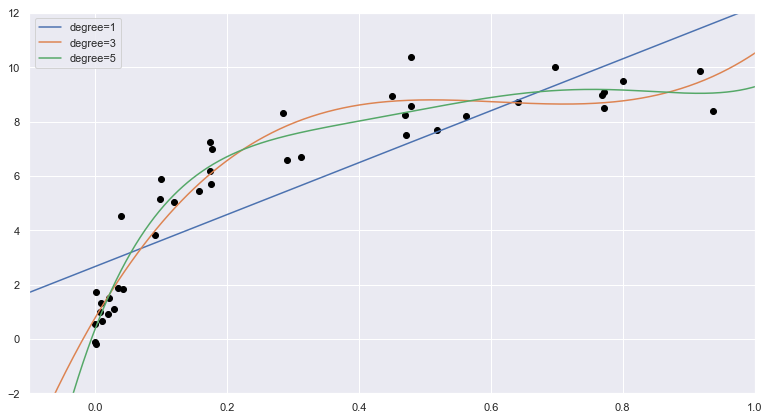

In [21]:
#We can now visualize our data, along with polynomial fits of several degrees:
import seaborn; seaborn.set()  # plot formatting
plt.figure(figsize=(13,7))
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

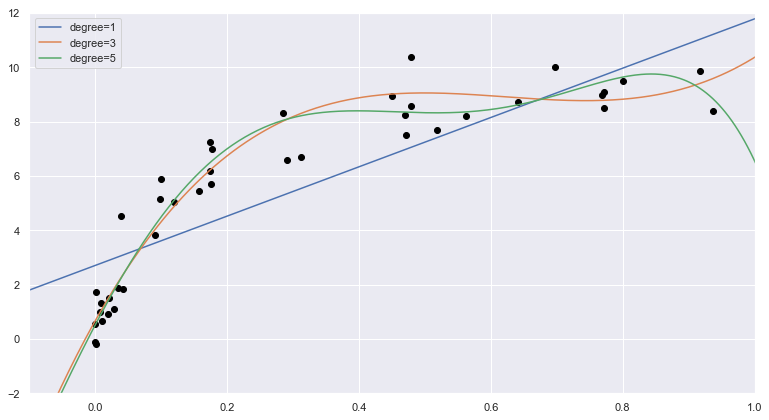

In [22]:
from sklearn.model_selection import train_test_split
plt.figure(figsize=(13,7))
x_train, x_test, y_train, y_test1 = train_test_split(X, y, test_size=0.3)

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(x_train, y_train).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


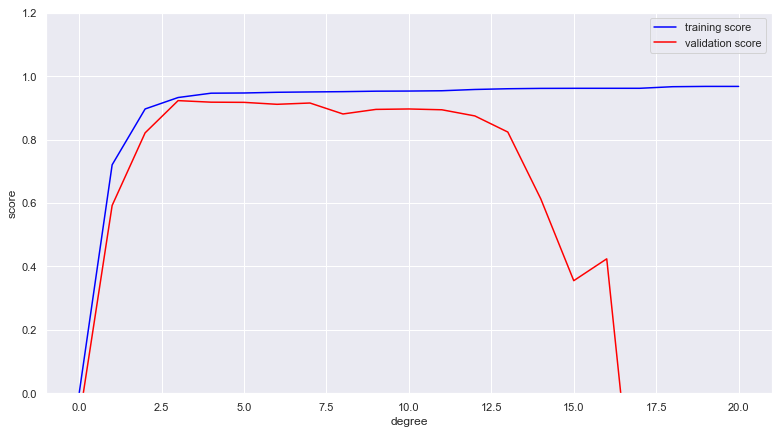

In [23]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
plt.figure(figsize=(13,7))
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1.2)
plt.xlabel('degree')
plt.ylabel('score');

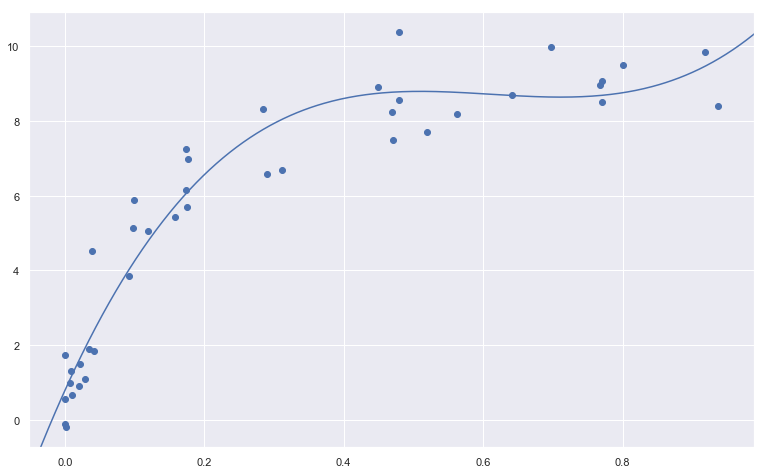

In [24]:
plt.figure(figsize=(13,8))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

## Learning Curves

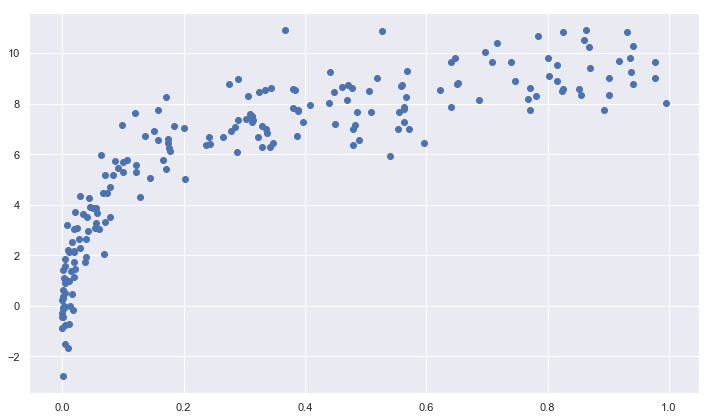

In [25]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

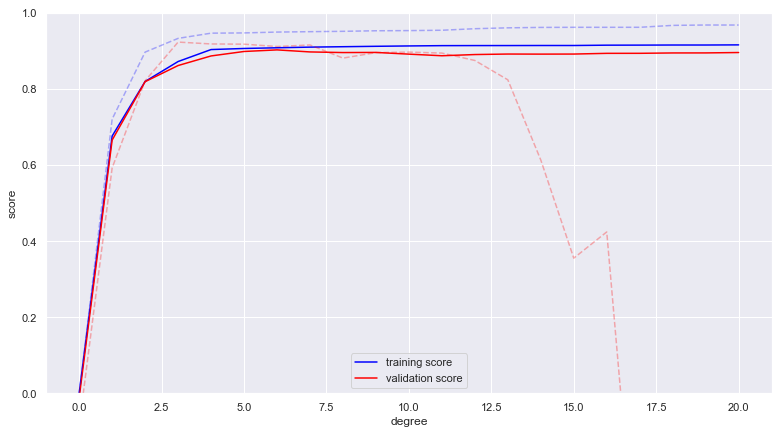

In [26]:
#We will duplicate the preceding code to plot the validation curve for this larger dataset; 
#for reference let's over-plot the previous results as well:
plt.figure(figsize=(13,7))
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

## Learning curves in Scikit-Learn

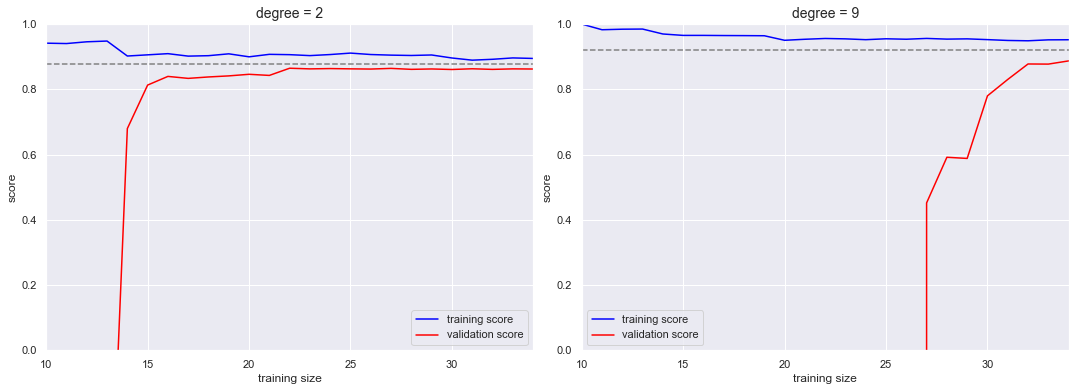

In [27]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

### Validation in Practice: Grid Search

Scikit-Learn provides automated tools to do this in the grid search module. 
Here is an example of using grid search to find the optimal polynomial model. 
We will explore a three-dimensional grid of model features; namely the polynomial degree, 
the flag telling us whether to fit the intercept, and the flag telling us whether to normalize the problem. 
This can be set up using Scikit-Learn's GridSearchCV meta-estimator:

In [28]:
from sklearn.grid_search import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Notice that like a normal estimator, this has not yet been applied to any data. Calling the fit() method will fit the model at each grid point, keeping track of the scores along the way:

In [29]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Now that this is fit, we can ask for the best parameters as follows:

In [30]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

fit_intercept=False sets the y-intercept to 0. If fit_intercept=True, the y-intercept will be determined by the line of best fit.

C:\Users\harsh\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3361: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


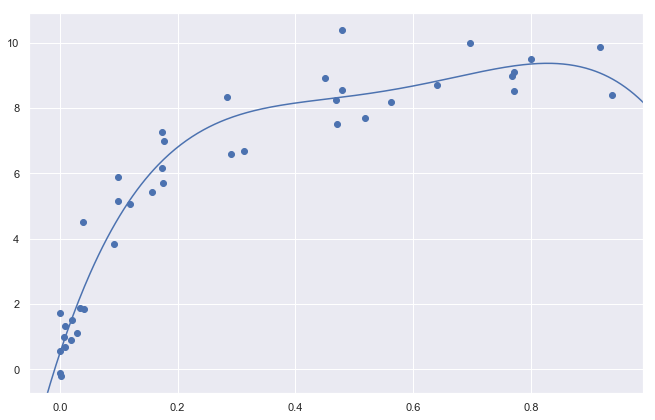

In [31]:
model = grid.best_estimator_
plt.figure(figsize=(11,7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
#plt.xlim(0,2)
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim);

## Example

In [32]:
import pandas as pd
data=pd.read_csv('train.csv')
data[:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [33]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [34]:
y= data['SalePrice'].values
x1 =data['GrLivArea'].values
x2= data['OverallQual'].values
x3=data['LotArea'].values
x4=data['MSSubClass'].values
x6=data['YearBuilt'].values
x7=data['GarageArea'].values
x8=data['BedroomAbvGr'].values
print(np.corrcoef(x1, y)[0, 1])
print(np.corrcoef(x2, y)[0, 1])
print(np.corrcoef(x3, y)[0, 1])
print(np.corrcoef(x4, y)[0, 1])
print(np.corrcoef(x6, y)[0, 1])
print(np.corrcoef(x7, y)[0, 1])
print(np.corrcoef(x8, y)[0, 1])

0.7086244776126522
0.7909816005838047
0.26384335387140573
-0.08428413512659526
0.5228973328794969
0.6234314389183617
0.16821315430074


In [35]:
x1

array([1710, 1262, 1786, ..., 2340, 1078, 1256], dtype=int64)

In [36]:
len(x1)

1460

In [37]:
x1.shape=(1460,1)

In [38]:
x1.reshape(-1,1)

array([[1710],
       [1262],
       [1786],
       ...,
       [2340],
       [1078],
       [1256]], dtype=int64)

In [39]:
len(y)

1460

In [40]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3)

In [47]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5)

In [48]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [49]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 1}

C:\Users\harsh\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3361: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


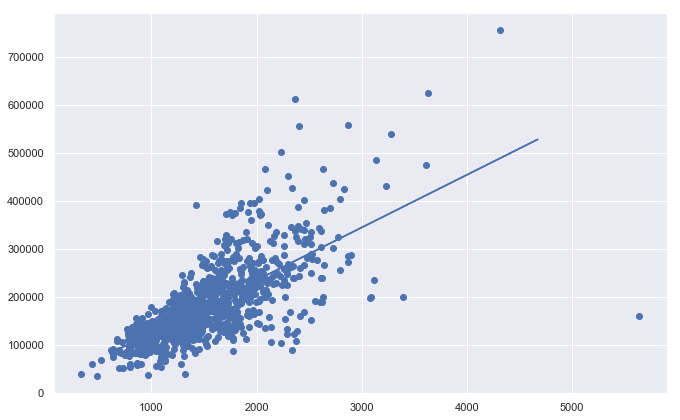

In [50]:
model = grid.best_estimator_
plt.figure(figsize=(11,7))
plt.scatter(x_train.ravel(), y_train)
lim = plt.axis()
#plt.xlim(0,2)
y_test = model.fit(x_train, y_train).predict(x_test)
plt.plot(x_test.ravel(), y_test, hold=True);
plt.axis(lim);